# Bessel Function of the First Kind
The Bessel functions of the first kind $J_n(t)$ are defined as the solutions to the Bessel differential equation
$$t^2\dfrac{d^2x}{dt^2}+t\dfrac{dx}{dt}+(t^2-n^2)x=0$$

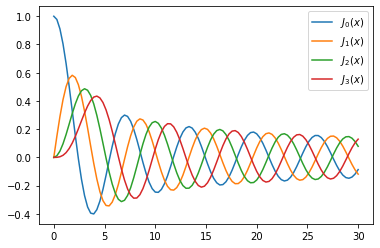

In [2]:
from scipy.special import jn, yn, jn_zeros, yn_zeros
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 30, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend()

# System with Bessel solution
Consider the system
$$\dfrac{x_1}{dt}=-\dfrac{x_1}{t}-x_2+e^{-t}-\dfrac{e^{-t}}{t}$$
$$\dfrac{x_2}{dt}=x_1+e^{-t}$$
with $x_1(0)=-1$ and $x_2(0)=-1$

# Explicit solution
Before system has explicit solution
$$x_1(t)=J_1(t)-e^{-t}$$
$$x_2(t)=-J_0(t)$$
where $J_1(t)$ and $J_0(t)$ are Bessel functions of first kind

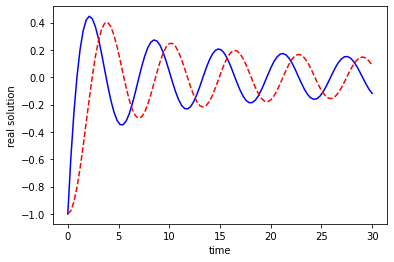

In [3]:
t = np.linspace(0,30,100)
x_1 = jn(1, t)-np.exp(-t)
x_2 = -jn(0, t)
# plot results
plt.plot(t,x_1,'b-',label=r'$x_1(t)$')
plt.plot(t,x_2,'r--',label=r'$x_2(t)$')
plt.ylabel('real solution')
plt.xlabel('time')
plt.show()

# Numerical solution

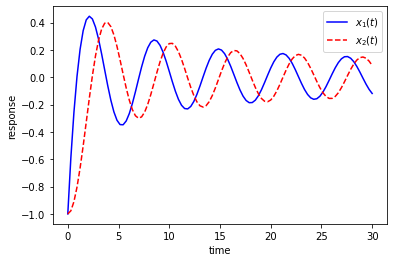

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(w,t):
    dxdt = -w[0]/(t+0.001)-w[1]+np.exp(-t)-np.exp(-t)/(t+0.001)
    dydt = w[0]+np.exp(-t)
    dwdt = [dxdt,dydt]
    return dwdt

# initial condition
w0 = [-1,-1]

# time points
t = np.linspace(0,30,100)

# solve ODE
w = odeint(model,w0,t)

# plot results
plt.plot(t,w[:,0],'b-',label=r'$x_1(t)$')
plt.plot(t,w[:,1],'r--',label=r'$x_2(t)$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [5]:
import numpy as np
from autode.evaluation import *
from autode.datagenerators import *
from autode.optimizers import *

In [9]:
gen3 = BesselDataGenerator()
t3 = np.linspace(0,30,100)
obs3 = gen3.generate_orig(t3)

In [11]:
evaluator = ODEINTEvaluator(t, obs3)

In [12]:
print("Final Error:", evaluator.evaluate([lambda x1, x2, t, a, b: a*x1/(t+0.001) + b * x2 + np.exp(-t) - np.exp(-t)/(t+0.001), lambda x1, x2, t, c: c * x1 + np.exp(-t)],attempts_per_exponent=1000))

Found new best model with score 61880.91157517201
Found new best model with score 7.722744058530379
Found new best model with score 6.732998344137021
Found new best model with score 6.643765059328171
Found new best model with score 6.616312463301302
Found new best model with score 6.581586919694522
Found new best model with score 6.581569827349947
Found new best model with score 6.555187176220416
Found new best model with score 6.553283276810665
Found new best model with score 2.5221019771625105e-17
Final Error: 2.5221019771625105e-17


In [13]:
%%time
evaluator.params_for_last_model

Wall time: 0 ns


name,value,initial value,min,max,vary
a,-1.00000000,-0.6438137287949273,-1.00000000,1.00000000,True
b,-1.00000000,-0.7983424595325401,-1.00000000,1.00000000,True
c,1.00000000,0.9272377104522518,-1.00000000,1.00000000,True
